Mouse_Neocortex

In [1]:
import random
import numpy as np
import scanpy as sc
import torch
import argparse
import yaml
from yaml import SafeLoader
from package.data_processing import LoadAdata
from package.model import STAMGC
import warnings


warnings.filterwarnings('ignore')
import os
os.chdir('/home/lsfcj/lsf/第一个工作3.0')
# os.chdir('/srv/homes/zzy/lsf/第一个工作3.0')

In [2]:
import os
print(os.getcwd())

/home/lsfcj/lsf/第一个工作3.0


In [2]:
file_fold='/data/lsfcj/DATA'
# file_fold='/srv/storage1/hdd/cff/lsfcj/DATA'

args = argparse.Namespace(
    dataset='Mouse_Neocortex',
    slice='Mouse_Neocortex_data',
    parameter='Slide_seqV2',
    batch_size=1,
    platform='Slide_seqV2',
    spot_size=20,
    config='./train_config.yaml',
    label=True,
)
config = yaml.load(open(args.config), Loader=SafeLoader)[str(args.parameter)]

slice_path = os.path.join(file_fold, args.platform, args.dataset, args.slice)

torch.manual_seed(config['seed'])
np.random.seed(config['seed'])
if torch.cuda.is_available():
    torch.cuda.manual_seed(config['seed'])
    torch.cuda.manual_seed_all(config['seed'])
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
random.seed(12345)
os.environ['CUBLAS_WORKSPACE_CONFIG'] = ':4096:8' 
torch.use_deterministic_algorithms(True)

In [4]:
# file_path=os.path.join(file_fold, args.platform, args.dataset, args.slice)+'/used_barcode.npy'
# if os.path.exists(file_path):
#     # 情况1: 文件存在，直接加载
#     print(f"文件 '{file_path}' 已存在，正在加载...")
#     used_barcode = np.load(file_path)
# else:
#     # 情况2: 文件不存在，生成并保存
#     print(f"文件 '{file_path}' 不存在，正在生成并保存...")
#     used_barcode = np.random.randint(0, 2, size=41786).astype(bool)
#     np.save(file_path, used_barcode)
#     print(f"数组已保存到: {file_path}")

In [3]:
# adata = LoadAdata(path=slice_path,dataset=args.dataset,slice=args.slice,config=config,args=args,used_barcode=True).run()
# print(adata)

Load data!
Preprocess!
Generate gene expression!
Load label!
Gaussian smooth data!
Construct adjacency matrix!
adata load done!
AnnData object with n_obs × n_vars = 20674 × 1933
    obs: 'barcode', 'x', 'y', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_counts', 'leiden', 'cluster', 'ground_truth'
    var: 'MT', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'dispersions', 'dispersions_norm', 'n_counts', 'mean', 'std'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'moranI', 'neighbors', 'pca', 'spatial_neighbors', 'umap', 'smooth_r'
    obsm: 'X_pca', 'X_umap', 'deconvolution_

In [3]:
data=sc.read_h5ad(slice_path+'.h5ad')
print(data)

AnnData object with n_obs × n_vars = 41786 × 4000
    obs: 'barcode', 'x', 'y', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_counts', 'leiden', 'cluster'
    var: 'MT', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'dispersions', 'dispersions_norm'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'moranI', 'neighbors', 'pca', 'spatial_neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'deconvolution_results', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'


In [3]:
adata=sc.read_h5ad('./results/'+args.dataset+'/'+args.slice+'/data_processing.h5ad')
print(adata)

AnnData object with n_obs × n_vars = 20674 × 1933
    obs: 'barcode', 'x', 'y', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_counts', 'leiden', 'cluster', 'ground_truth'
    var: 'MT', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'dispersions', 'dispersions_norm', 'n_counts', 'mean', 'std'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'moranI', 'neighbors', 'pca', 'smooth_r', 'spatial_neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'deconvolution_results', 'gene_feat', 'graph_neigh', 'graph_neigh_coor', 'negative_mask', 'smooth_gene', 'spatial'
    varm: 'PCs'
    obsp: 'c

=== Generate pseudo labels! ===


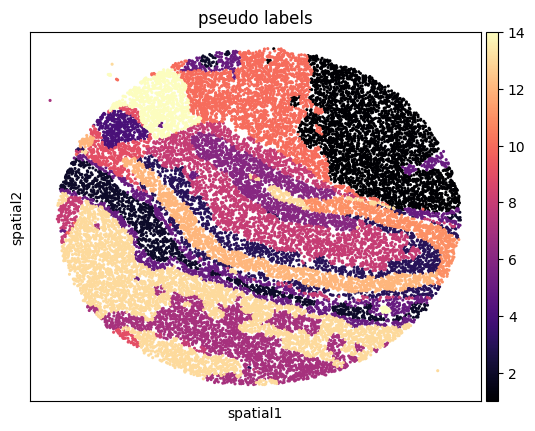

=== train ===
epoch: 0  total_loss: 6.817697525024414  alpha: 10  beta: 0.3  gama: 0.7
epoch: 1  total_loss: 6.784402370452881  alpha: 10  beta: 0.3  gama: 0.7
epoch: 2  total_loss: 6.761212348937988  alpha: 10  beta: 0.3  gama: 0.7
epoch: 3  total_loss: 6.739325046539307  alpha: 10  beta: 0.3  gama: 0.7
epoch: 4  total_loss: 6.715179920196533  alpha: 10  beta: 0.3  gama: 0.7
epoch: 5  total_loss: 6.685102939605713  alpha: 10  beta: 0.3  gama: 0.7
epoch: 6  total_loss: 6.6501240730285645  alpha: 10  beta: 0.3  gama: 0.7
epoch: 7  total_loss: 6.609683036804199  alpha: 10  beta: 0.3  gama: 0.7
epoch: 8  total_loss: 6.569586753845215  alpha: 10  beta: 0.3  gama: 0.7
epoch: 9  total_loss: 6.533540725708008  alpha: 10  beta: 0.3  gama: 0.7
epoch: 10  total_loss: 6.501271724700928  alpha: 10  beta: 0.3  gama: 0.7
epoch: 11  total_loss: 6.469034671783447  alpha: 10  beta: 0.3  gama: 0.7
epoch: 12  total_loss: 6.437710285186768  alpha: 10  beta: 0.3  gama: 0.7
epoch: 13  total_loss: 6.40911912

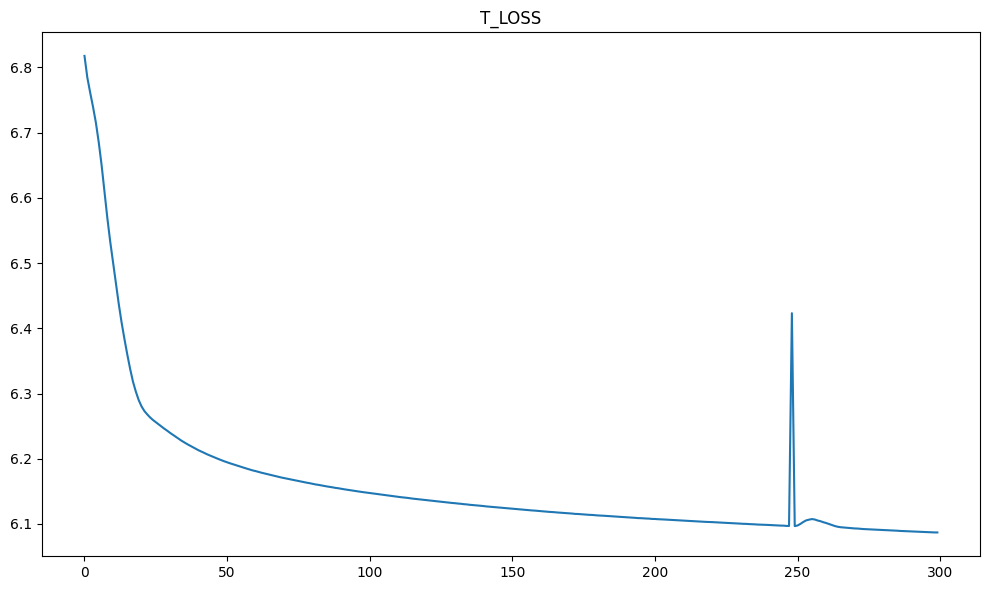

=== load ===
embedding generated, go clustering
calculate metric ARI
ARI: 0.06256670925600138
NMI: 0.14246647489907002


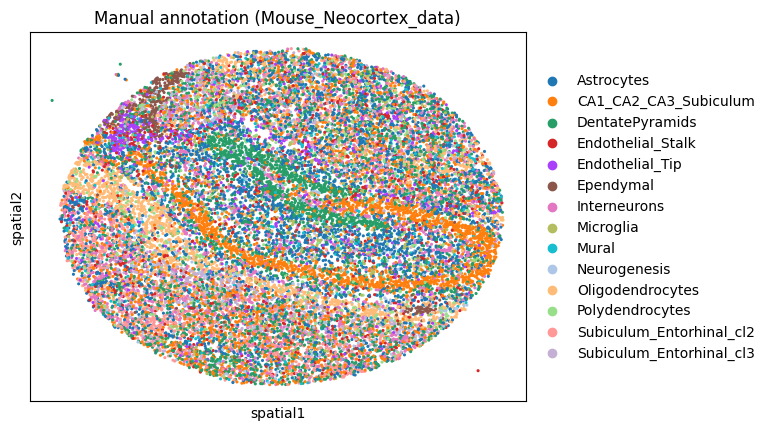

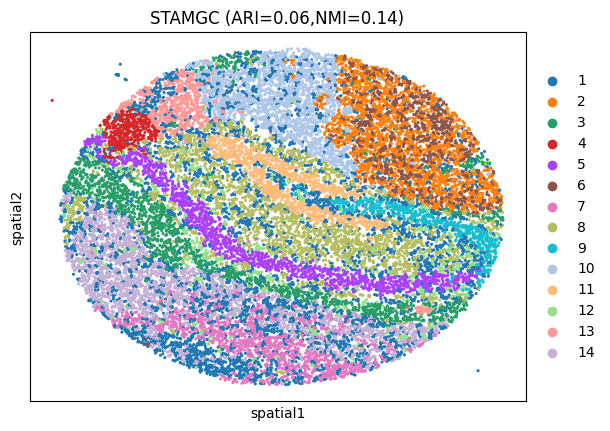

complete!


In [4]:
# from matplotlib import pyplot as plt
# plt.rcParams['figure.figsize'] = (10, 5)
adata=STAMGC(adata,config,args,load=True).run()

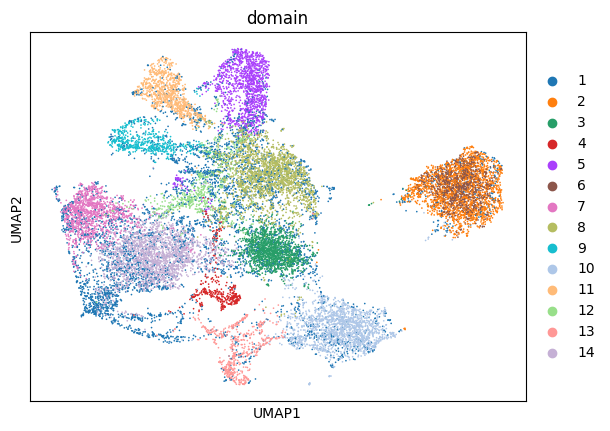

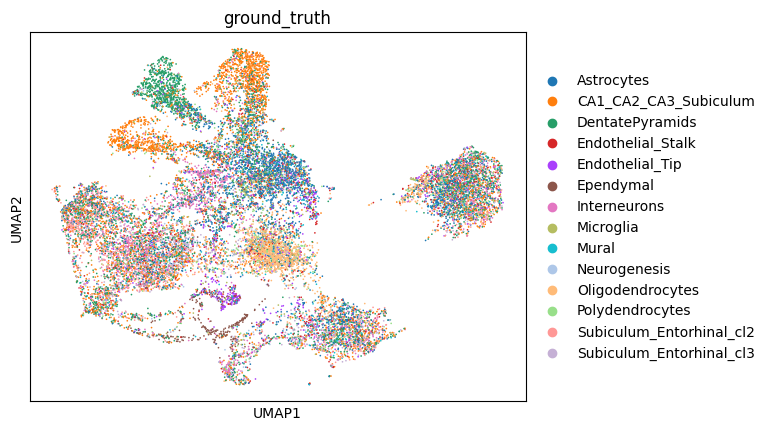

In [8]:
from matplotlib import pyplot as plt

color=['domain','ground_truth']
sc.pp.neighbors(adata, use_rep='z', metric='cosine')
sc.tl.umap(adata)
for i in color:
    sc.pl.umap(adata, color=i, show=False)
    plt.savefig('./results/'+args.dataset+'/'+args.slice+'/'+i+'_umap.png')
    plt.show()

In [3]:
adata=sc.read_h5ad('./results/'+args.dataset+'/'+args.slice+'/STAMGC.h5ad')
print(adata)

AnnData object with n_obs × n_vars = 20674 × 1933
    obs: 'barcode', 'x', 'y', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_counts', 'leiden', 'cluster', 'ground_truth', 'pseudo_labels', 'domain'
    var: 'MT', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'dispersions', 'dispersions_norm', 'n_counts', 'mean', 'std'
    uns: 'ari', 'cluster_colors', 'domain_colors', 'ground_truth_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'moranI', 'neighbors', 'nmi', 'pca', 'smooth_r', 'spatial_neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'deconvolution_results', 'emb_pca', 'gene_feat', 'graph_neigh'

['5', '9', '11', '5&9']
5


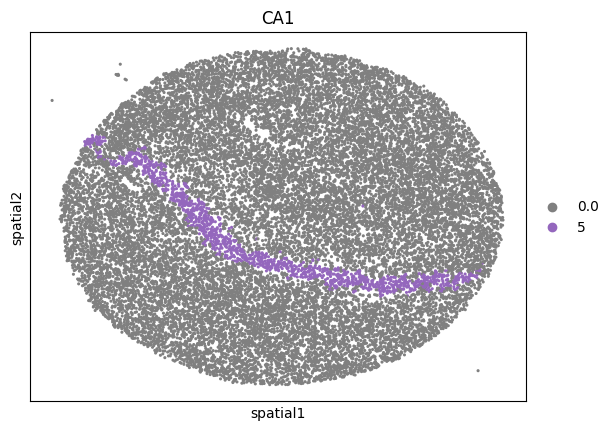

9


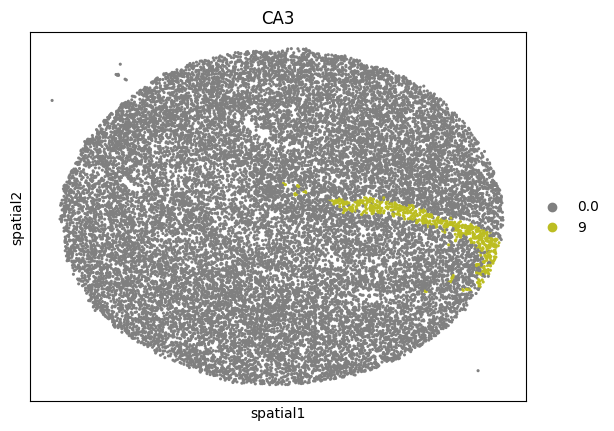

11


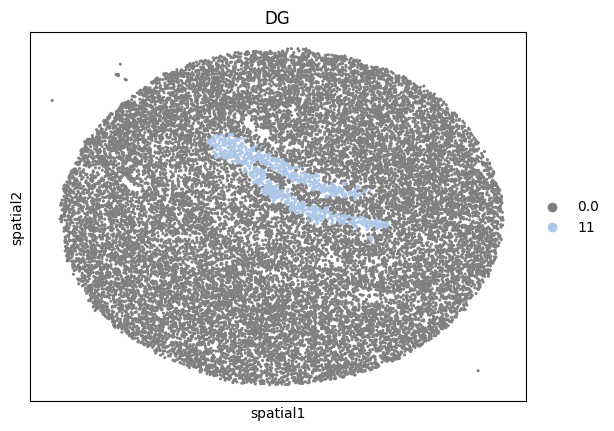

5&9


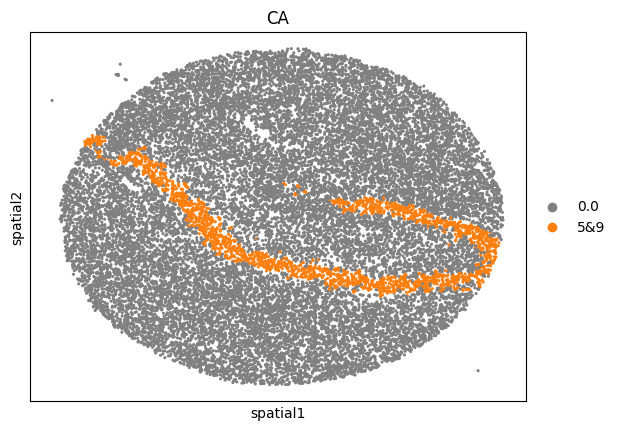

In [37]:
import pandas as pd
from matplotlib import pyplot as plt
pl = ['#9467bd', '#bcbd22', '#aec7e8', '#ff7f0e']
title=['CA1','CA3','DG','CA']
adata.obs['domain']=adata.obs['domain'].astype('str')
clusters = ['5','9','11','5&9']
print(clusters)
# 创建保存目录
output_dir = f'./results/{args.dataset}/{args.slice}/clusters'
os.makedirs(output_dir, exist_ok=True)
n_type = 4
zeros = np.zeros([adata.n_obs, n_type])
matrix_clusters = pd.DataFrame(zeros, index=adata.obs_names, columns=clusters)
for cell in list(adata.obs_names):
    cluster = adata.obs.loc[cell, 'domain']
    matrix_clusters.loc[cell, str(cluster)] = cluster
    if cluster in ['5','9']:
        matrix_clusters.loc[cell, '5&9'] = '5&9'
adata.obs[matrix_clusters.columns] = matrix_clusters.astype(str)
# 为每个聚类创建单独的可视化
for j,cluster in enumerate(clusters):
    print(cluster)
    sc.pl.embedding(adata, basis="spatial", color=cluster, s=20,title=title[j], palette=['gray', pl[j]],show=False)
    plt.savefig(output_dir +'/'+ title[j] + '.png',bbox_inches='tight', dpi=600)
    plt.show()

In [5]:
data=sc.read_h5ad(slice_path+'.h5ad')
sc.pp.normalize_total(data, target_sum=1e4)
sc.pp.log1p(data)
sc.pp.scale(data, zero_center=False, max_value=10)

错误: 基因 'ltpka' 不存在于数据中
可用的基因示例: ['1010001B22Rik', '1110002J07Rik', '1110017D15Rik', '1190002F15Rik', '1300017J02Rik', '1500012K07Rik', '1500015O10Rik', '1500017E21Rik', '1600002K03Rik', '1700001C02Rik']
绘制基因 'Hs3st4' 的空间表达分布...
图像已保存到: ./results/Mouse_Neocortex/Mouse_Neocortex_data/genes/Hs3st4_spatial.png


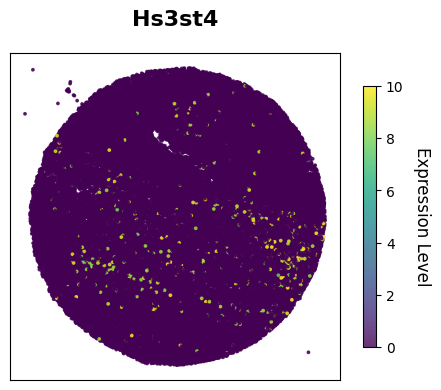

绘制基因 'Lrrtm4' 的空间表达分布...
图像已保存到: ./results/Mouse_Neocortex/Mouse_Neocortex_data/genes/Lrrtm4_spatial.png


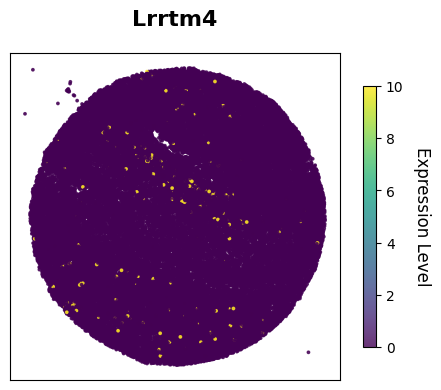

In [6]:
from package.utils import plot_spatial_gene_expression
# adata.obs['domain']=adata.obs['domain'].astype('str')
marker_genes=['ltpka','Hs3st4','Lrrtm4']
for i in marker_genes:
    plot_spatial_gene_expression(data,i,spot_size=3,save_path=f'./results/{args.dataset}/{args.slice}/genes/{i}_spatial.png',platform='Slide_seqV2')

In [9]:
# import networkx as nx
# import matplotlib.pyplot as plt
# 
# # A = coor_adj# 邻接矩阵
# A=adata.obsm['graph_neigh']
# pos = adata.obsm['spatial']# 每行对应节点的真实坐标
# 
# # 2. 建图
# G = nx.from_numpy_array(A)             # 无向图；有向加 create_using=nx.DiGraph
# 
# # 3. 把坐标转成 NetworkX 要的 dict 格式
# pos_dict = {i: pos[i] for i in range(len(pos))}
# 
# # 4. 画图
# plt.figure(figsize=(8,8))
# nx.draw(G, pos_dict,
#         with_labels=False,
#         node_color='orange',
#         edgecolors='black',
#         node_size=5,
#         font_weight='bold')
# plt.axis('equal')                      # 保持 x/y 比例一致
# plt.show()